In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm
# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime
pd.options.display.float_format = '{:20,.2f}'.format
import env


In [2]:
import wrangle

from wrangle import get_zillow_data

In [3]:
df = pd.read_csv('zillowcluster_df.csv')

In [4]:
df.head()

Unnamed: 0  typeconstructiontypeid          storytypeid  \
0           0                     nan                  nan   
1           1                     nan                  nan   
2           2                     nan                  nan   
3           3                     nan                  nan   
4           4                     nan                  nan   

   heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
0                   2.00                  nan                       nan   
1                   2.00                  nan                       nan   
2                   2.00                  nan                       nan   
3                   2.00                  nan                       nan   
4                   2.00                  nan                       nan   

   airconditioningtypeid  parcelid       id         basementsqft  ...  \
0                    nan  10711855  1087254                  nan  ...   
1                   1.00  10711877  1072280                  nan  ...   
2                   1.00  10711888  1340933                  nan  ...   
3                    nan  10711910  1878109                  nan  ...   
4                    nan  10711923  2190858                  nan  ...   

    taxdelinquencyyear   censustractandblock             logerror  \
0                  nan 60,371,132,321,007.00                -0.01   
1                  nan 60,371,132,321,007.00                 0.02   
2                  nan 60,371,132,321,007.00                 0.08   
3                  nan 60,371,132,321,008.00                -0.04   
4                  nan 60,371,132,321,008.00                -0.01   

   transactiondate  airconditioningdesc  architecturalstyledesc  \
0       2017-07-07                  NaN                     NaN   
1       2017-08-29              Central                     NaN   
2       2017-04-04              Central                     NaN   
3       2017-03-17                  NaN                     NaN   
4       2017-03-24                  NaN                     NaN   

   buildingclassdesc  heatingorsystemdesc  storydesc  typeconstructiondesc  
0                NaN              Central        NaN                   NaN  
1                NaN              Central        NaN                   NaN  
2                NaN              Central        NaN                   NaN  
3                NaN              Central        NaN                   NaN  
4                NaN              Central        NaN                   NaN  

[5 rows x 68 columns]

In [5]:
df.shape

(77413, 68)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77413 entries, 0 to 77412
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77413 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   heatingorsystemtypeid         49439 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   parcelid                      77413 non-null  int64  
 8   id                            77413 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77380 non-null  float64
 11  bedroomcnt                    77380 non-null  float64
 12  buildingqualitytypeid         49671 non-null  float64
 13  c

In [7]:
df.describe()

Unnamed: 0  typeconstructiontypeid          storytypeid  \
count            77,413.00                  222.00                50.00   
mean             38,706.00                    6.04                 7.00   
std              22,347.35                    0.56                 0.00   
min                   0.00                    4.00                 7.00   
25%              19,353.00                    6.00                 7.00   
50%              38,706.00                    6.00                 7.00   
75%              58,059.00                    6.00                 7.00   
max              77,412.00                   13.00                 7.00   

       heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
count              49,439.00                15.00                    206.00   
mean                    3.92                 3.93                      7.39   
std                     3.59                 0.26                      2.73   
min                     1.00                 3.00                      2.00   
25%                     2.00                 4.00                      7.00   
50%                     2.00                 4.00                      7.00   
75%                     7.00                 4.00                      7.00   
max                    24.00                 4.00                     21.00   

       airconditioningtypeid             parcelid                   id  \
count              24,953.00            77,413.00            77,413.00   
mean                    1.81        13,006,697.32         1,495,761.15   
std                     2.97         3,480,712.14           861,270.67   
min                     1.00        10,711,855.00               349.00   
25%                     1.00        11,538,336.00           752,413.00   
50%                     1.00        12,530,673.00         1,498,471.00   
75%                     1.00        14,211,486.00         2,241,718.00   
max                    13.00       167,689,317.00         2,985,182.00   

              basementsqft  ...      numberofstories        fireplaceflag  \
count                50.00  ...            17,560.00               172.00   
mean                679.72  ...                 1.43                 1.00   
std                 689.70  ...                 0.54                 0.00   
min                  38.00  ...                 1.00                 1.00   
25%                 273.00  ...                 1.00                 1.00   
50%                 515.00  ...                 1.00                 1.00   
75%                 796.50  ...                 2.00                 1.00   
max               3,560.00  ...                 6.00                 1.00   

       structuretaxvaluedollarcnt    taxvaluedollarcnt       assessmentyear  \
count                   77,268.00            77,379.00            77,380.00   
mean                   189,315.98           490,137.46             2,016.00   
std                    230,088.56           653,447.67                 0.00   
min                         44.00             1,000.00             2,016.00   
25%                     84,265.00           207,000.00             2,016.00   
50%                    136,499.50           358,976.00             2,016.00   
75%                    218,787.50           569,003.00             2,016.00   
max                 11,421,790.00        49,061,236.00             2,016.00   

       landtaxvaluedollarcnt            taxamount   taxdelinquencyyear  \
count              77,378.00            77,375.00             2,886.00   
mean              301,096.94             5,995.57                14.09   
std               492,599.03             7,622.89                 2.19   
min                   161.00                19.92                 3.00   
25%                85,504.00             2,715.59                14.00   
50%               203,383.50             4,450.72                15.00   
75%               366,802.25         

In [8]:
df.isnull().sum()

Unnamed: 0                          0
typeconstructiontypeid          77191
storytypeid                     77363
heatingorsystemtypeid           27974
buildingclasstypeid             77398
architecturalstyletypeid        77207
airconditioningtypeid           52460
parcelid                            0
id                                  0
basementsqft                    77363
bathroomcnt                        33
bedroomcnt                         33
buildingqualitytypeid           27742
calculatedbathnbr                 642
decktypeid                      76799
finishedfloor1squarefeet        71390
calculatedfinishedsquarefeet      229
finishedsquarefeet12             3665
finishedsquarefeet13            77372
finishedsquarefeet15            74404
finishedsquarefeet50            71390
finishedsquarefeet6             77027
fips                               33
fireplacecnt                    69137
fullbathcnt                       642
garagecarcnt                    51939
garagetotals

In [9]:
from wrangle import clean_zillow

In [10]:
df = clean_zillow(df)

In [11]:
df.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
parcelid                                                                      
10711855                   2.00                   5.00                 2.00   
10711877                   2.00                   1.00                 2.00   
10711888                   2.00                   1.00                 2.00   
10711910                   2.00                   5.00                 2.00   
10711923                   2.00                   5.00                 2.00   

                   bedroomcnt  calculatedfinishedsquarefeet  fips  \
parcelid                                                            
10711855                 3.00                      2,107.00  6037   
10711877                 4.00                      1,882.00  6037   
10711888                 4.00                      1,882.00  6037   
10711910                 3.00                      1,477.00  6037   
10711923                 4.00                      1,918.00  6037   

                     latitude            longitude    lotsizesquarefeet  \
parcelid                                                                  
10711855                34.22              -118.62             9,158.00   
10711877                34.22              -118.62             9,035.00   
10711888                34.22              -118.62             9,800.00   
10711910                34.22              -118.62            11,285.00   
10711923                34.22              -118.62            11,239.00   

                      poolcnt  ...              age_bin       baths_per_sqft  \
parcelid                       ...                                             
10711855                 1.00  ...                 0.33                 0.00   
10711877                 1.00  ...                 0.33                 0.00   
10711888                 0.00  ...                 0.33                 0.00   
10711910                 1.00  ...                 0.47                 0.00   
10711923                 1.00  ...                 0.47                 0.00   

                      taxrate       bath_bed_ratio                acres  \
parcelid                                                                  
10711855                 1.23                 0.67                 0.21   
10711877                 1.23                 0.50                 0.21   
10711888                 1.23                 0.50                 0.22   
10711910                 1.43                 0.67                 0.26   
10711923                 1.26                 0.50                 0.26   

                    acres_bin             sqft_bin la_county orange_county  \
parcelid                                                                     
10711855                 0.30                 0.50         1             0   
10711877                 0.30                 0.40         1             0   
10711888                 0.30                 0.40         1             0   
10711910                 0.30                 0.30         1             0   
10711923                 0.30                 0.40         1             0   

          ventura_county  
parcelid                  
10711855               0  
10711877               0  
10711888               0  
10711910               0  
10711923               0  

[5 rows x 30 columns]

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.shape

(73150, 30)

In [14]:
df.describe()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
count              73,150.00              73,150.00            73,150.00   
mean                    2.90                   3.94                 2.26   
std                     3.23                   2.28                 0.90   
min                     1.00                   1.00                 1.00   
25%                     1.00                   1.00                 2.00   
50%                     2.00                   5.00                 2.00   
75%                     2.00                   5.00                 3.00   
max                    24.00                  13.00                10.00   

                bedroomcnt  calculatedfinishedsquarefeet             latitude  \
count            73,150.00                     73,150.00            73,150.00   
mean                  3.01                      1,726.81                34.01   
std                   0.99                        835.66                 0.27   
min                   1.00                        152.00                33.34   
25%                   2.00                      1,168.00                33.81   
50%                   3.00                      1,514.00                34.02   
75%                   4.00                      2,052.00                34.18   
max                  11.00                      7,970.00                34.82   

                 longitude    lotsizesquarefeet              poolcnt  \
count            73,150.00            73,150.00            73,150.00   
mean               -118.20            28,372.46                 0.21   
std                   0.36           119,455.55                 0.41   
min                -119.48               236.00                 0.00   
25%                -118.42             5,991.00                 0.00   
50%                -118.17             7,280.00                 0.00   
75%                -117.92            10,705.00                 0.00   
max                -117.55         6,971,010.00                 1.00   

                   roomcnt  ...              age_bin       baths_per_sqft  \
count            73,150.00  ...            73,150.00            73,150.00   
mean                  1.55  ...                 0.37                 0.00   
std                   2.87  ...                 0.15                 0.00   
min                   0.00  ...                 0.00                 0.00   
25%                   0.00  ...                 0.27                 0.00   
50%                   0.00  ...                 0.33                 0.00   
75%                   0.00  ...                 0.47                 0.00   
max                  14.00  ...                 0.93                 0.01   

                   taxrate       bath_bed_ratio                acres  \
count            73,150.00            73,150.00            73,150.00   
mean                  1.31                  inf                 0.65   
std                   0.58                  nan                 2.74   
min                   0.01                 0.00                 0.01   
25%                   1.16                 0.60                 0.14   
50%                   1.23                 0.75                 0.17   
75%                   1.34                 1.00                 0.25   
max                  81.65                  inf               160.03   

                 acres_bin             sqft_bin            la_county  \
count            73,150.00            73,150.00            73,150.00   
mean                  0.21                 0.35                 0.64   
std                   0.15                 0.19                 0.48   
min                   0.00                 0.00                 0.00   
25%                   0.10                 0.20                 0.00   
50%                   0.20                 0.40                 1.00   
75%                   0.30                 0.50                 1.00   
max                   0.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73150 entries, 10711855 to 167688532
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         73150 non-null  float64       
 1   airconditioningtypeid         73150 non-null  float64       
 2   bathroomcnt                   73150 non-null  float64       
 3   bedroomcnt                    73150 non-null  float64       
 4   calculatedfinishedsquarefeet  73150 non-null  float64       
 5   fips                          73150 non-null  object        
 6   latitude                      73150 non-null  float64       
 7   longitude                     73150 non-null  float64       
 8   lotsizesquarefeet             73150 non-null  float64       
 9   poolcnt                       73150 non-null  float64       
 10  roomcnt                       73150 non-null  float64       
 11  yearbuilt        

In [16]:
df.isnull().sum()

heatingorsystemtypeid           0
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
roomcnt                         0
yearbuilt                       0
fireplaceflag                   0
taxvaluedollarcnt               0
taxamount                       0
logerror                        0
transactiondate                 0
airconditioningdesc             0
heatingorsystemdesc             0
age_of_home                     0
age_bin                         0
baths_per_sqft                  0
taxrate                         0
bath_bed_ratio                  0
acres                           0
acres_bin                       0
sqft_bin                        0
la_county                       0
orange_county                   0
ventura_county

In [17]:
from wrangle import missing_zero_values_table

In [18]:
missing_zero_values_table(df)

Your selected dataframe has 30 columns and 73150 Rows.
There are 0 columns that have NULL values.


Zero Values  null_count    % of Total Values  \
heatingorsystemtypeid                   0           0                 0.00   
airconditioningtypeid                   0           0                 0.00   
orange_county                       53050           0                 0.00   
la_county                           26180           0                 0.00   
sqft_bin                             3411           0                 0.00   
acres_bin                            7792           0                 0.00   
acres                                   0           0                 0.00   
bath_bed_ratio                         16           0                 0.00   
taxrate                                 0           0                 0.00   
baths_per_sqft                         16           0                 0.00   
age_bin                                 4           0                 0.00   
age_of_home                             0           0                 0.00   
heatingorsystemdesc                     0           0                 0.00   
airconditioningdesc                     0           0                 0.00   
transactiondate                         0           0                 0.00   
logerror                                0           0                 0.00   
taxamount                               0           0                 0.00   
taxvaluedollarcnt                       0           0                 0.00   
fireplaceflag                       64773           0                 0.00   
yearbuilt                               0           0                 0.00   
roomcnt                             55722           0                 0.00   
poolcnt                             57468           0                 0.00   
lotsizesquarefeet                       0           0                 0.00   
longitude                               0           0                 0.00   
latitude                                0           0                 0.00   
fips                                    0           0                 0.00   
calculatedfinishedsquarefeet            0           0                 0.00   
bedroomcnt                              0           0                 0.00   
bathroomcnt                             0           0                 0.00   
ventura_county                      67070           0                 0.00   

                              Total Zeroes + Null Values  \
heatingorsystemtypeid                                  0   
airconditioningtypeid                                  0   
orange_county                                      53050   
la_county                                          26180   
sqft_bin                                            3411   
acres_bin                                           7792   
acres                                                  0   
bath_bed_ratio                                        16   
taxrate                                                0   
baths_per_sqft                                        16   
age_bin                                                4   
age_of_home                                            0   
heatingorsystemdesc                                    0   
airconditioningdesc                                    0   
transactiondate                                        0   
logerror                                               0   
taxamount                                              0   
taxvaluedollarcnt                                      0   
fireplaceflag                                      64773   
yearbuilt                                              0   
roomcnt                                            55722   
poolcnt                                            57468   
lotsizesquarefeet                                      0   
longitude                                              0   
latitude                                               0   
fips                                               

In [19]:
from wrangle import split

In [20]:
train, validate, test = split(df)

In [21]:
train. shape

(40964, 30)

In [22]:
validate.shape

(17556, 30)

In [23]:
test.shape

(14630, 30)

In [24]:
from wrangle import seperate_y

In [25]:
X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [26]:
from wrangle import scale_data

In [27]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [28]:
train_scaled.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
0                   0.26                   0.33                 0.00   
1                   0.04                   0.00                 0.11   
2                   0.04                   0.00                 0.11   
3                   0.26                   0.33                 0.00   
4                   0.04                   0.00                 0.00   

            bedroomcnt  calculatedfinishedsquarefeet             latitude  \
0                 0.10                          0.09                 0.38   
1                 0.10                          0.12                 0.43   
2                 0.10                          0.10                 0.57   
3                 0.20                          0.11                 0.49   
4                 0.20                          0.16                 0.30   

             longitude    lotsizesquarefeet              poolcnt  \
0                 0.67                 0.00                 0.00   
1                 0.57                 0.00                 1.00   
2                 0.46                 0.02                 1.00   
3                 0.87                 0.00                 0.00   
4                 0.67                 0.01                 0.00   

               roomcnt  ...          age_of_home              age_bin  \
0                 0.00  ...                 0.54                 0.57   
1                 0.00  ...                 0.04                 0.14   
2                 0.00  ...                 0.04                 0.14   
3                 0.00  ...                 0.47                 0.50   
4                 0.00  ...                 0.08                 0.14   

        baths_per_sqft              taxrate                acres  \
0                 0.09                 0.06                 0.00   
1                 0.14                 0.04                 0.00   
2                 0.16                 0.04                 0.02   
3                 0.08                 0.07                 0.00   
4                 0.05                 0.04                 0.01   

             acres_bin             sqft_bin            la_county  \
0                 0.22                 0.11                 1.00   
1                 0.22                 0.22                 1.00   
2                 0.56                 0.22                 1.00   
3                 0.22                 0.22                 1.00   
4                 0.56                 0.44                 1.00   

         orange_county       ventura_county  
0                 0.00                 0.00  
1                 0.00                 0.00  
2                 0.00                 0.00  
3                 0.00                 0.00  
4                 0.00                 0.00  

[5 rows x 24 columns]

In [29]:
validate_scaled.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
0                   0.04                   0.33                 0.22   
1                   0.26                   0.33                 0.00   
2                   0.00                   0.33                 0.17   
3                   0.04                   0.33                 0.22   
4                   0.00                   0.33                 0.22   

            bedroomcnt  calculatedfinishedsquarefeet             latitude  \
0                 0.10                          0.22                 0.50   
1                 0.10                          0.05                 0.53   
2                 0.20                          0.19                 0.14   
3                 0.20                          0.23                 0.53   
4                 0.20                          0.16                 0.57   

             longitude    lotsizesquarefeet              poolcnt  \
0                 0.48                 0.04                 0.00   
1                 0.67                 0.00                 0.00   
2                 0.96                 0.00                 0.00   
3                 0.71                 0.00                 1.00   
4                 0.15                 0.00                 0.00   

               roomcnt  ...          age_of_home              age_bin  \
0                 0.00  ...                 0.28                 0.36   
1                 0.00  ...                 0.71                 0.71   
2                 0.00  ...                 0.10                 0.14   
3                 0.00  ...                 0.57                 0.64   
4                 0.36  ...                 0.34                 0.43   

        baths_per_sqft              taxrate                acres  \
0                 0.13                 0.04                 0.04   
1                 0.12                 0.04                 0.00   
2                 0.12                 0.05                 0.00   
3                 0.12                 0.05                 0.00   
4                 0.17                 0.04                 0.00   

             acres_bin             sqft_bin            la_county  \
0                 0.67                 0.44                 1.00   
1                 0.11                 0.00                 1.00   
2                 0.22                 0.44                 0.00   
3                 0.33                 0.44                 1.00   
4                 0.00                 0.33                 0.00   

         orange_county       ventura_county  
0                 0.00                 0.00  
1                 0.00                 0.00  
2                 1.00                 0.00  
3                 0.00                 0.00  
4                 0.00                 1.00  

[5 rows x 24 columns]

In [30]:
test_scaled.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
0                   0.00                   0.33                 0.11   
1                   0.04                   0.33                 0.11   
2                   0.00                   0.33                 0.00   
3                   0.04                   0.00                 0.22   
4                   0.00                   0.33                 0.11   

            bedroomcnt  calculatedfinishedsquarefeet             latitude  \
0                 0.10                          0.12                 0.40   
1                 0.20                          0.17                 0.60   
2                 0.00                          0.02                 0.21   
3                 0.20                          0.31                 0.29   
4                 0.20                          0.22                 0.29   

             longitude    lotsizesquarefeet              poolcnt  \
0                 0.79                 0.00                 0.00   
1                 0.52                 0.00                 0.00   
2                 0.99                 0.00                 0.00   
3                 0.71                 0.00                 1.00   
4                 0.83                 0.00                 0.00   

               roomcnt  ...          age_of_home              age_bin  \
0                 0.00  ...                 0.24                 0.29   
1                 0.00  ...                 0.43                 0.50   
2                 0.00  ...                 0.22                 0.29   
3                 0.00  ...                 0.26                 0.29   
4                 0.43  ...                 0.47                 0.50   

        baths_per_sqft              taxrate                acres  \
0                 0.14                 0.04                 0.00   
1                 0.10                 0.05                 0.00   
2                 0.20                 0.05                 0.00   
3                 0.09                 0.04                 0.00   
4                 0.08                 0.04                 0.00   

             acres_bin             sqft_bin            la_county  \
0                 0.22                 0.22                 0.00   
1                 0.22                 0.44                 1.00   
2                 0.22                 0.00                 0.00   
3                 0.00                 0.67                 1.00   
4                 0.22                 0.44                 0.00   

         orange_county       ventura_county  
0                 1.00                 0.00  
1                 0.00                 0.00  
2                 1.00                 0.00  
3                 0.00                 0.00  
4                 1.00                 0.00  

[5 rows x 24 columns]

# Exploration

In [31]:
train.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
parcelid                                                                      
12290362                   7.00                   5.00                 1.00   
11454739                   2.00                   1.00                 2.00   
10794853                   2.00                   1.00                 2.00   
13065298                   7.00                   5.00                 1.00   
12554566                   2.00                   1.00                 1.00   

                   bedroomcnt  calculatedfinishedsquarefeet  fips  \
parcelid                                                            
12290362                 2.00                        934.00  6037   
11454739                 2.00                      1,140.00  6037   
10794853                 2.00                      1,050.00  6037   
13065298                 3.00                      1,081.00  6037   
12554566                 3.00                      1,511.00  6037   

                     latitude            longitude    lotsizesquarefeet  \
parcelid                                                                  
12290362                33.90              -118.19             6,968.00   
11454739                33.98              -118.38             7,280.00   
10794853                34.18              -118.60           134,581.00   
13065298                34.06              -117.80             7,207.00   
12554566                33.78              -118.19            46,277.00   

                      poolcnt  ...              age_bin       baths_per_sqft  \
parcelid                       ...                                             
12290362                 0.00  ...                 0.53                 0.00   
11454739                 1.00  ...                 0.13                 0.00   
10794853                 1.00  ...                 0.13                 0.00   
13065298                 0.00  ...                 0.47                 0.00   
12554566                 0.00  ...                 0.13                 0.00   

                      taxrate       bath_bed_ratio                acres  \
parcelid                                                                  
12290362                 1.85                 0.50                 0.16   
11454739                 1.22                 1.00                 0.17   
10794853                 1.21                 1.00                 3.09   
13065298                 2.13                 0.33                 0.17   
12554566                 1.23                  inf                 1.06   

                    acres_bin             sqft_bin la_county orange_county  \
parcelid                                                                     
12290362                 0.20                 0.10         1             0   
11454739                 0.20                 0.20         1             0   
10794853                 0.50                 0.20         1             0   
13065298                 0.20                 0.20         1             0   
12554566                 0.50                 0.40         1             0   

          ventura_county  
parcelid                  
12290362               0  
11454739               0  
10794853               0  
13065298               0  
12554566               0  

[5 rows x 30 columns]

In [32]:
train.shape

(40964, 30)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40964 entries, 12290362 to 14696354
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         40964 non-null  float64       
 1   airconditioningtypeid         40964 non-null  float64       
 2   bathroomcnt                   40964 non-null  float64       
 3   bedroomcnt                    40964 non-null  float64       
 4   calculatedfinishedsquarefeet  40964 non-null  float64       
 5   fips                          40964 non-null  object        
 6   latitude                      40964 non-null  float64       
 7   longitude                     40964 non-null  float64       
 8   lotsizesquarefeet             40964 non-null  float64       
 9   poolcnt                       40964 non-null  float64       
 10  roomcnt                       40964 non-null  float64       
 11  yearbuilt         

In [34]:
train.describe()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
count              40,964.00              40,964.00            40,964.00   
mean                    2.90                   3.93                 2.26   
std                     3.24                   2.28                 0.90   
min                     1.00                   1.00                 1.00   
25%                     1.00                   1.00                 2.00   
50%                     2.00                   5.00                 2.00   
75%                     2.00                   5.00                 3.00   
max                    24.00                  13.00                10.00   

                bedroomcnt  calculatedfinishedsquarefeet             latitude  \
count            40,964.00                     40,964.00            40,964.00   
mean                  3.01                      1,723.87                34.01   
std                   0.99                        827.72                 0.27   
min                   1.00                        240.00                33.34   
25%                   2.00                      1,170.00                33.81   
50%                   3.00                      1,514.00                34.02   
75%                   4.00                      2,049.00                34.18   
max                  11.00                      7,970.00                34.81   

                 longitude    lotsizesquarefeet              poolcnt  \
count            40,964.00            40,964.00            40,964.00   
mean               -118.20            28,495.25                 0.21   
std                   0.36           121,919.83                 0.41   
min                -119.48               435.00                 0.00   
25%                -118.42             5,985.00                 0.00   
50%                -118.17             7,280.00                 0.00   
75%                -117.92            10,652.25                 0.00   
max                -117.55         6,971,010.00                 1.00   

                   roomcnt  ...              age_bin       baths_per_sqft  \
count            40,964.00  ...            40,964.00            40,964.00   
mean                  1.53  ...                 0.37                 0.00   
std                   2.85  ...                 0.15                 0.00   
min                   0.00  ...                 0.00                 0.00   
25%                   0.00  ...                 0.27                 0.00   
50%                   0.00  ...                 0.33                 0.00   
75%                   0.00  ...                 0.47                 0.00   
max                  14.00  ...                 0.93                 0.01   

                   taxrate       bath_bed_ratio                acres  \
count            40,964.00            40,964.00            40,964.00   
mean                  1.31                  inf                 0.65   
std                   0.42                  nan                 2.80   
min                   0.01                 0.00                 0.01   
25%                   1.16                 0.60                 0.14   
50%                   1.23                 0.75                 0.17   
75%                   1.34                 1.00                 0.24   
max                  29.49                  inf               160.03   

                 acres_bin             sqft_bin            la_county  \
count            40,964.00            40,964.00            40,964.00   
mean                  0.21                 0.35                 0.64   
std                   0.15                 0.19                 0.48   
min                   0.00                 0.00                 0.00   
25%                   0.10                 0.20                 0.00   
50%                   0.20                 0.40                 1.00   
75%                   0.30                 0.50                 1.00   
max                   0.

In [36]:
train = train.drop(columns = 'bath_bed_ratio')

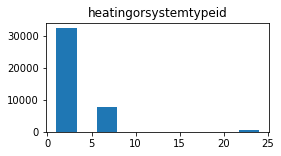

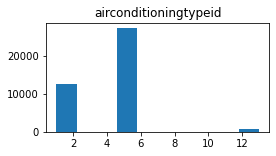

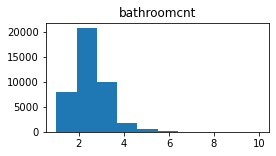

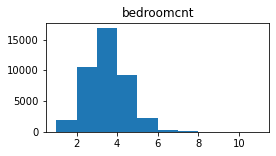

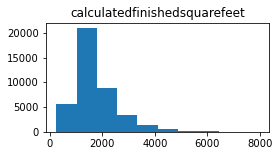

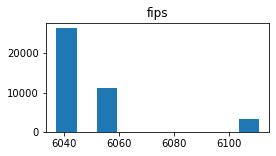

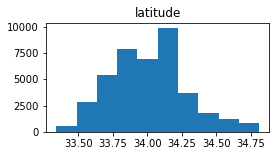

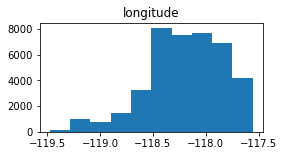

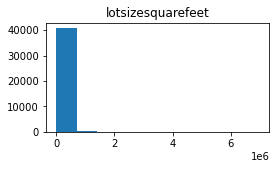

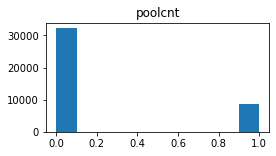

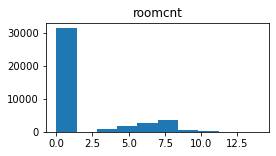

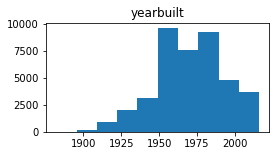

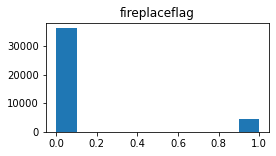

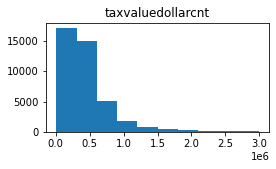

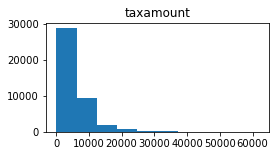

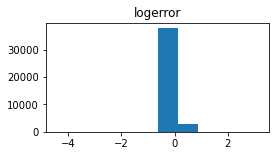

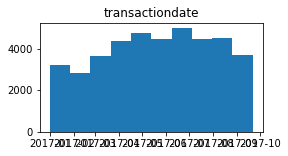

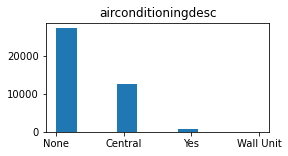

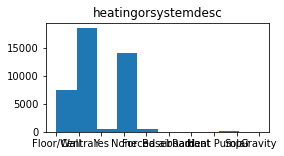

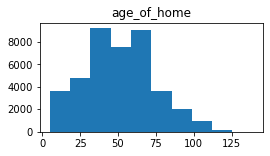

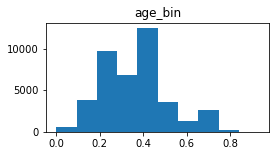

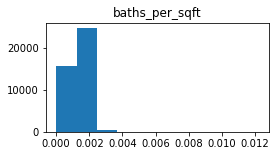

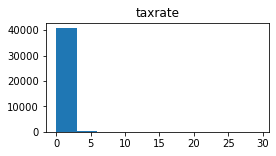

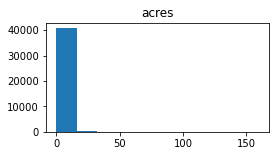

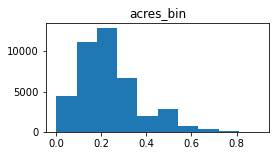

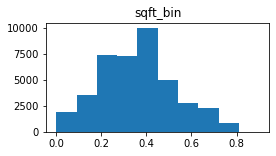

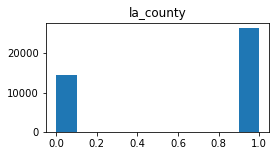

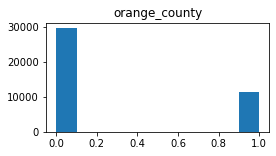

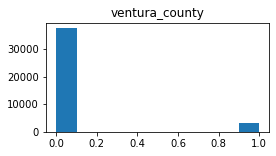

In [37]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

### Takeaways:

- most homes are in LA county

- may have some outliers 
    - tax rate
    - acres
    - logerror
    - tax amount
    - lot size square ft

- most bins have normal distribution

- bathrooms and bedrooms appear to be correlated 

- 


In [38]:
train.corr()

heatingorsystemtypeid  airconditioningtypeid  \
heatingorsystemtypeid                          1.00                   0.05   
airconditioningtypeid                          0.05                   1.00   
bathroomcnt                                   -0.29                  -0.19   
bedroomcnt                                    -0.18                   0.02   
calculatedfinishedsquarefeet                  -0.24                  -0.06   
latitude                                      -0.03                  -0.43   
longitude                                      0.05                   0.18   
lotsizesquarefeet                             -0.04                  -0.15   
poolcnt                                       -0.11                  -0.14   
roomcnt                                       -0.12                   0.41   
fireplaceflag                                 -0.17                   0.24   
taxvaluedollarcnt                             -0.15                  -0.02   
taxamount                                     -0.14                  -0.06   
logerror                                      -0.01                   0.00   
age_of_home                                    0.33                   0.23   
age_bin                                        0.32                   0.23   
baths_per_sqft                                -0.06                  -0.19   
taxrate                                        0.06                  -0.08   
acres                                         -0.04                  -0.15   
acres_bin                                     -0.10                  -0.35   
sqft_bin                                      -0.27                  -0.05   
la_county                                      0.22                  -0.47   
orange_county                                 -0.13                   0.42   
ventura_county                                -0.17                   0.14   

                                      bathroomcnt           bedroomcnt  \
heatingorsystemtypeid                       -0.29                -0.18   
airconditioningtypeid                       -0.19                 0.02   
bathroomcnt                                  1.00                 0.58   
bedroomcnt                                   0.58                 1.00   
calculatedfinishedsquarefeet                 0.79                 0.68   
latitude                                     0.03                 0.08   
longitude                                   -0.01                -0.00   
lotsizesquarefeet                            0.01                -0.09   
poolcnt                                      0.22                 0.13   
roomcnt                                      0.05                 0.21   
fireplaceflag                                0.08                 0.15   
taxvaluedollarcnt                            0.52                 0.30   
taxamount                                    0.52                 0.31   
logerror                                     0.03                 0.03   
age_of_home                                 -0.45                -0.09   
age_bin                                     -0.44                -0.09   
baths_per_sqft                               0.18                -0.29   
taxrate                                     -0.10                -0.00   
acres                                        0.01                -0.09   
acres_bin                                    0.15                -0.09   
sqft_bin                                     0.77                 0.71   
la_county                                   -0.07                -0.08   
orange_county                                0.06                 0.05   
ventura_county                               0.03                 0.07   

                              calculatedfinishedsquarefeet  \
heatingorsystemtypeid                                -0.24   
airconditioningtypeid                                -0.06   
bathroomcnt                               